


Dr. Gulustan Dogan took some of the content from <a href="https://madewithml.com/about/">Made with ML book</a>.

Dr. Yang Song did minor changes.
   

# Pandas

In this lesson we will learn the basics of data manipulation using the Pandas library.

* Primary objects in Pandas are DataFrames
* DataFrames are like tables
    * Contain rows and columns of data
    * Columns have names
    * Rows have index values
* Pandas has easy functions for importing and exporting data
    * CSV files
    * Excel spreadsheets
    * SQL queries
    * XML and others

# Set up

In [ ]:
#import numpy and pandas libraries
import numpy as np
import pandas as pd

In [ ]:
# Set seed for reproducibility
np.random.seed(seed=1234)

# Importing Data from Files

Please download the files in this [link](https://drive.google.com/drive/folders/1jxyf3T-1x-ZH5cfbY9B_l_OPP4cmgNnd?usp=sharing) and upload them to your Colab Notebooks folder in Google Drive to keep them for your future reference

**Alternative method for uploading files:** We will upload the documents to this session by using Files functionality of the Google Colab.

CSV

In [ ]:
# This part of code requires you to connect your *entire* google drive to this notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# I have the datafile in google drive root/Colab Notebooks/data/test_pandas.csv
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_pandas.csv')
df.head()


,0,1,cat,1.1
0,1,2,dog,2.2
1,2,3,bird,3.3


In [ ]:
df

,0,1,cat,1.1
0,1,2,dog,2.2
1,2,3,bird,3.3


Opening a file with header set to None

In [ ]:
df_no_header = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_pandas_no_header.csv', header=None)
df_no_header

,0,1,2,3,4
0,0,0,1,cat,1.1
1,1,1,2,dog,2.2
2,2,2,3,bird,3.3


EXCEL

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/test_pandas.xlsm', 'Sheet1')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df

,Column A,Column B,Column C
0,1,cat,1.1
1,2,dog,2.2
2,3,bird,3.3


# Load data

We're going to work with the [Titanic dataset](https://www.kaggle.com/c/titanic/data) which has data on the people who embarked the RMS Titanic in 1912 and whether they survived the expedition or not. It's a very common and rich dataset which makes it very apt for exploratory data analysis with Pandas.

Let's load the data from the CSV file into a Pandas dataframe. The `header=0` signifies that the first row (0th index) is a header row which contains the names of each column in our dataset.

In [ ]:
#change your directory to your Colab Notebooks which contains titanic.csv
%cd "/content/drive/My Drive/Colab Notebooks/data"

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
#run the pwd=print working directory command to see which directory you are at
!pwd

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# read the CSV file
import pandas as pd
df=pd.read_csv('train.csv')

In [ ]:
# First five items
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


These are the different features:
* `class`: class of travel
* `name`: full name of the passenger
* `sex`: gender
* `age`: numerical age
* `sibsp`: # of siblings/spouse aboard
* `parch`: number of parents/child aboard
* `ticket`: ticket number
* `fare`: cost of the ticket
* `cabin`: location of room
* `emarked`: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q - Queenstown)
* `survived`: survial metric (0 - died, 1 - survived)

# Exploratory data analysis (EDA)

Now that we loaded our data, we're ready to start exploring it to find interesting information.



In [ ]:
import matplotlib.pyplot as plt

We can select columns with basic indexing.

Selecting a single column:

In [ ]:
df['Age'] # This gives you a single column, this datatype is Series in Pandas

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df.Age # a different syntax, only works with column names without white spaces ;-)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Selecting multiple columns:

In [1]:
df[['Age', 'Fare','Name']]

NameError: name 'df' is not defined

We can select rows with slicing.

In [ ]:
df[20:45]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


We can use `.describe()` to extract some standard details about our numerical features.

In [ ]:
# Describe features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.sample()  # Return a random sample.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info() # pay attention to the Dtype, if it's "object", this is a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

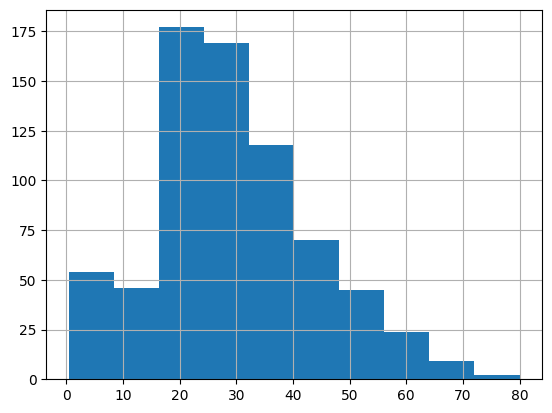

In [ ]:
# Histograms
df["Age"].hist()

In [ ]:
# Unique values
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)




# YData-profiling (the former version is Pandas Profiling)

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile = df.profile_report()

In [ ]:
df.profile_report()
profile.to_file("titanic.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <s>Filtering</s> Masking (Boolean indexing)

When you want to select rows based on a certain condition like a where clause in SQL, boolean masks can be used.

In [ ]:
df['Fare'] > 20

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888     True
889     True
890    False
Name: Fare, Length: 891, dtype: bool

In [ ]:
df[df['Fare'] > 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# Selecting data by feature
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
df.Sex[df.Sex=='male'].count()

577

In [ ]:
# Filtering
df[df["Sex"]=="female"].head() # only the female data appear

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C






#### <font color="green">Exercise 1: Select all passengers that are male.</font>

In [ ]:
df[df["Sex"]=="male"]
df[df["Sex"]=="male"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


What does the code below do?

In [ ]:
male_survivor_mask = (df.Sex=='male') & (df.Age>=18)

In [ ]:
male_survivor_mask

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Length: 891, dtype: bool

In [ ]:
df[male_survivor_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Sorting

In [ ]:
# Sorting
df.sort_values("Age", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [ ]:
# Exercise 2 - how do you find passengers who paid the highest "Fare"? - find the top 10
df.sort_values("Fare", ascending=False).head(10)

,original_index,Pclass,Sex,Age,SibSp,Parch,family_size,Fare,Embarked,Survived
151,679,1,1,36.0,0,1,1,512.3292,1,1
168,737,1,1,35.0,0,0,0,512.3292,1,1
16,88,1,0,23.0,3,2,5,263.0000,0,1
80,341,1,0,24.0,3,2,5,263.0000,0,1
7,27,1,1,19.0,3,2,5,263.0000,0,0
96,438,1,1,64.0,1,4,5,263.0000,0,0
68,311,1,0,18.0,2,2,4,262.3750,1,1
171,742,1,0,21.0,2,2,4,262.3750,1,1
62,299,1,0,50.0,0,1,1,247.5208,1,1
22,118,1,1,24.0,0,1,1,247.5208,1,0


# Grouping

In [ ]:
# Grouping
survived_group = df.groupby("Survived")
survived_group.Age.mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Calculate the average survival ratio for all passengers.

In [ ]:
df['Survived'].mean() # Because this is a 0/1 column

0.3838383838383838

Calculate the average survival ratio for female and male.

In [ ]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### <font color="green">Exercise 3: Calculate the average age of male passengers.</font>


In [ ]:
sex_group= df.groupby('Sex')
sex_group.Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

# Indexing

We can use `iloc` to get rows or columns at particular positions in the dataframe.

In [ ]:
# Selecting row 0
df.iloc[1, 1:3]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [ ]:
# Selecting a specific value
df.iloc[0, 1]

0

# Missing Value Imputation

There are various ways we can imputate the missing values. We can replace the missing/null values with either of 3 M’s (Mean/ Mode/ Median) depending on the possible values of the given column, or simply drop the missing values. We can also fill in missing values using prediction model (such as regression).

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing Age**

In [ ]:
df['Age'] = df['Age'].fillna(25)

**Missing Embarked**

In [ ]:
df.Embarked.value_counts() # remember there are two NANs in the Embarked column. But when you do value_counts(), they do not show below
                           # the majority of the passengers embarked at "S".

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df['Embarked']=df['Embarked'].fillna("C")

In [ ]:
#df['Embarked']=df['Embarked'].fillna(df.Embarked.mode())  # .mode() will provide the majority of the value in a column.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We can drop missing values as well please see the examples below.

# Preprocessing

After exploring, we can clean and preprocess our dataset.


In [ ]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
# Dropping multiple columns
df = df.drop(["Name", "Cabin", "Ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,female,38.0,1,0,71.2833,C
1,3,4,1,1,female,35.0,1,0,53.1000,S
2,6,7,0,1,male,54.0,0,0,51.8625,S
3,10,11,1,3,female,4.0,1,1,16.7000,S
4,11,12,1,1,female,58.0,0,0,26.5500,S


In [ ]:
df = df.rename(columns={"index":"original_index"}) # change the column name - index to original index
df.head()
df = df.rename(columns={"Age":"age"})

,original_index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,female,38.0,1,0,71.2833,C
1,3,4,1,1,female,35.0,1,0,53.1000,S
2,6,7,0,1,male,54.0,0,0,51.8625,S
3,10,11,1,3,female,4.0,1,1,16.7000,S
4,11,12,1,1,female,58.0,0,0,26.5500,S


In [ ]:
# Map feature values - most of ML models do not like categorical features
df["Sex"] = df["Sex"].map( {"female": 0, "male": 1} ).astype(int)
df["Embarked"] = df["Embarked"].dropna().map( {"S":0, "C":1, "Q":2} ).astype(int)
df.head()

,original_index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,0,38.0,1,0,71.2833,1
1,3,4,1,1,0,35.0,1,0,53.1000,0
2,6,7,0,1,1,54.0,0,0,51.8625,0
3,10,11,1,3,0,4.0,1,1,16.7000,0
4,11,12,1,1,0,58.0,0,0,26.5500,0


# Feature engineering

We're now going to use feature engineering to create a column called `family_size`. We'll first define a function called `get_family_size` that will determine the family size using the number of parents and siblings.

In [ ]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

Once we define the function, we can use `lambda` to `apply` that function on each row (using the numbers of siblings and parents in each row to determine the family size for each row).

In [ ]:
df["family_size"] = df[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)
df.head()

,original_index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,1,2,1,1,0,38.0,1,0,71.2833,1,1
1,3,4,1,1,0,35.0,1,0,53.1000,0,1
2,6,7,0,1,1,54.0,0,0,51.8625,0,0
3,10,11,1,3,0,4.0,1,1,16.7000,0,2
4,11,12,1,1,0,58.0,0,0,26.5500,0,0


In [ ]:
# Reorganize headers
df = df[["original_index","Sex", "Pclass", "Age", "SibSp", "Parch", "family_size", "Fare", "Embarked", "Survived"]]
df.head()

,original_index,Pclass,Sex,Age,SibSp,Parch,family_size,Fare,Embarked,Survived
0,1,1,0,38.0,1,0,1,71.2833,1,1
1,3,1,0,35.0,1,0,1,53.1000,0,1
2,6,1,1,54.0,0,0,0,51.8625,0,0
3,10,3,0,4.0,1,1,2,16.7000,0,1
4,11,1,0,58.0,0,0,0,26.5500,0,1


# Save data

Finally, let's save our preprocessed data into a new CSV file to use later.

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/data


In [ ]:
# Saving dataframe to CSV
df.to_csv("processed_titanic.csv", index=False)

In [ ]:
# See the saved file
!ls -l

total 16525
-rw------- 1 root root   68248 Apr 24  2023 a2.txt
-rw------- 1 root root 2671062 Jun  7  2023 absence.txt
-rw------- 1 root root  390903 Jun 28  2023 Data_jialu.csv
-rw------- 1 root root    2351 Jun  7  2023 fish_clustering.csv
-rw------- 1 root root  751253 Apr 13  2023 loan_data.csv
-rw------- 1 root root 3698097 Jun  7  2023 presence.txt
-rw------- 1 root root    6060 May 19 22:30 processed_titanic.csv
-rw------- 1 root root 4286439 Jun  7  2023 seaice.csv
-rw------- 1 root root   41817 Jun  7  2023 t4.8k_output.csv
-rw------- 1 root root   33051 Jun  7  2023 t4.8k_sample.csv
-rw------- 1 root root  172918 Jun  7  2023 t4.8k.txt
-rw------- 1 root root      40 Jun  4  2023 test_pandas.csv
-rw------- 1 root root      43 Jun  4  2023 test_pandas_no_header.csv
-rw------- 1 root root   30093 Jun  4  2023 test_pandas.xlsm
-rw------- 1 root root 4702958 May 19 22:22 titanic.html
-rw------- 1 root root   62086 Jun  4  2023 train.csv


## Remember to turn in your file to "105 Pandas" assignment.

There are three exercises in this file.